# Multilevel modification on predefined DR-embedding

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import pandas as pd
import umap.plot
from ucimlrepo import fetch_ucirepo

d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\numba\np\ufunc\dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, erro

In [3]:
import sys

sys.path.append("../")
import visualization
import processing
import evaluation

## UCI-ID 360, Air Quality

### Import

In [7]:
# fetch dataset (available at https://archive.ics.uci.edu/dataset/360/air+quality)
dataset = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X_uci360 = pd.DataFrame(dataset.data.features)
y_uci360 = pd.DataFrame(dataset.data.targets)

target_feature_uci360 = "NOx(GT)"

X_uci360.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [10]:
X_uci360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [11]:
X_uci360 = X_uci360.drop(columns=["Date", "Time"])

### Compute initial UMAP-Embedding

In [12]:
umap_mapper_uci360 = umap.UMAP(n_neighbors=15, min_dist=1, random_state=0)
umap_mapper_uci360.fit(X_uci360)
umap_embedding_uci360 = umap_mapper_uci360.embedding_
graph_umap_knn_uci360 = umap_mapper_uci360.graph_

graph_umap_knn_uci360 = nx.Graph(graph_umap_knn_uci360)

d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [13]:
pairwise_distances_uci360 = processing.compute_pairwise_dists(
    X_uci360, invert=False, sim_features=[target_feature_uci360]
)

for u, v in graph_umap_knn_uci360.edges():
    graph_umap_knn_uci360[u][v]["weight"] = pairwise_distances_uci360[u][v]

### Compute Modifications

In [14]:
embeddings_uci360 = processing.compute_multilevel_dr(
    graph=graph_umap_knn_uci360,
    initial_pos=umap_embedding_uci360,
    pairwise_dists=pairwise_distances_uci360,
    mst=False,
    boundary_edges=False,
    threshold=None,
)

------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 1


d:\Software-Projekte\Uni\modDR\.venv\lib\site-packages\networkx\drawing\layout.py:724: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


Computation finished after 61.57 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 2
Computation finished after 12.28 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 3
Computation finished after 24.01 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing modified embedding via Kamada Kawai-layouting at level 4
Computation finished after 23.57 seconds
------------------------------------------------------------


In [15]:
for emb in embeddings_uci360:
    emb.labels = {i: X_uci360.at[i, target_feature_uci360] for i in range(len(X_uci360))}

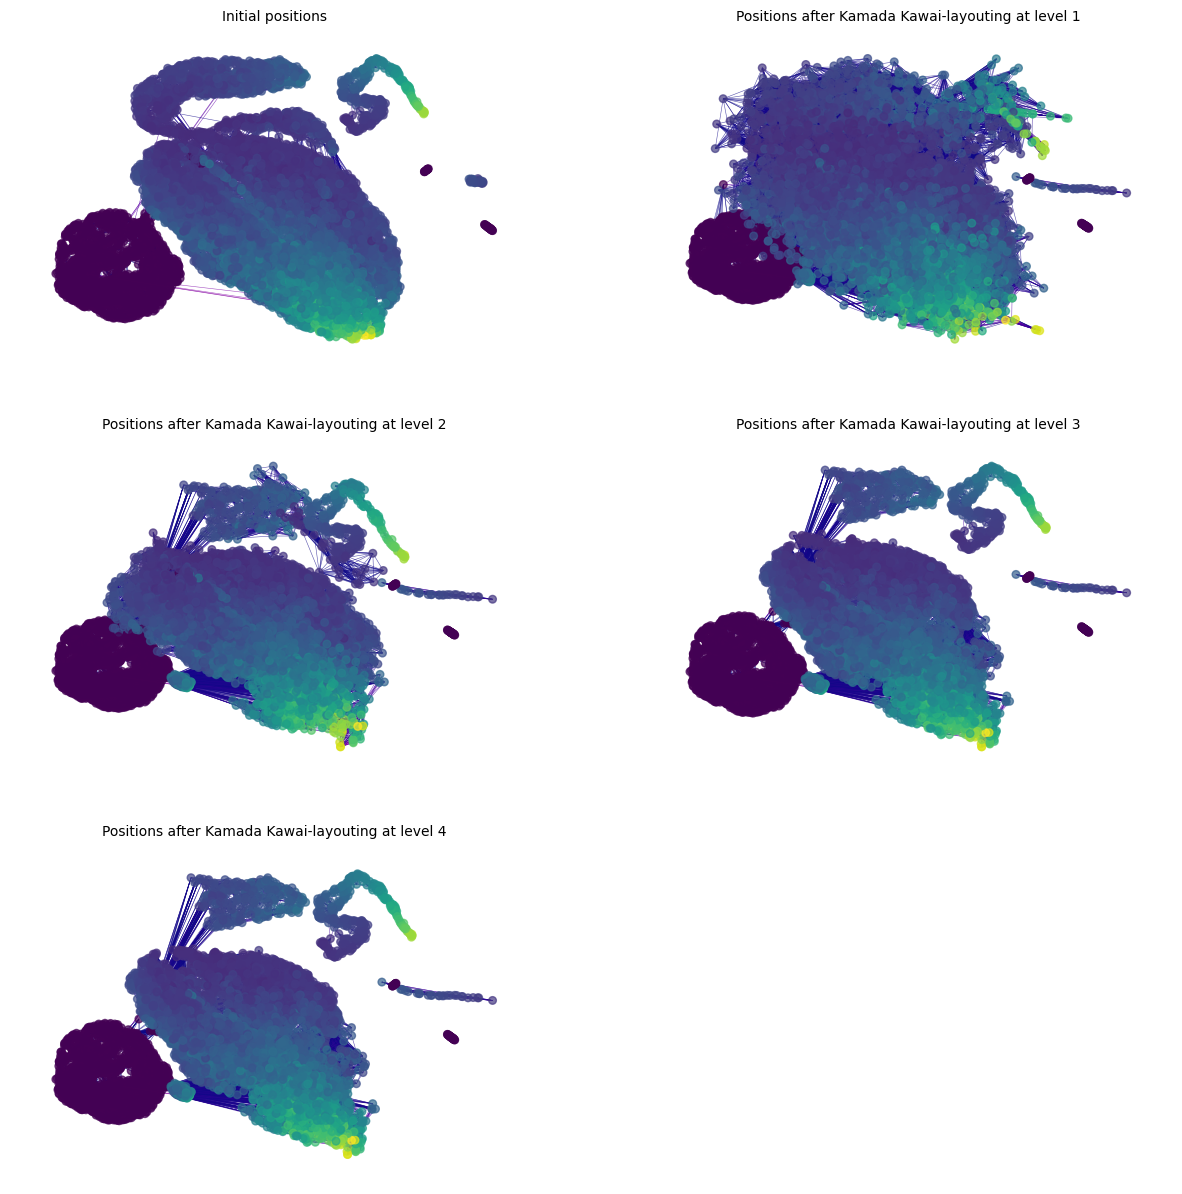

In [16]:
visualization.display_graphs(
    embeddings_uci360,
    figsize_columns=2,
    figsize=(15, 15),
    show_edges=True,
    cmap="viridis",
    show_cbar=False,
    show_partition_centers=False,
)

### Evaluation

In [17]:
embeddings_uci360 = evaluation.compute_pairwise_metrics(X_uci360, embeddings_uci360)

------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  0
Computation finished after 3.06 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  1
Computation finished after 2.70 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  2
Computation finished after 2.58 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  3
Computation finished after 2.91 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing pairwise metrics for embedding with marker:  4
Comput

In [18]:
embeddings_uci360 = evaluation.compute_global_metrics(X_uci360, embeddings_uci360, [target_feature_uci360])

------------------------------------------------------------
Computing global metrics for embedding with marker:  0


D:\Software-Projekte\Uni\modDR\src\evaluation.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(stress_numerator / stress_denominator)


Computation finished after 108.11 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  1


D:\Software-Projekte\Uni\modDR\src\evaluation.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(stress_numerator / stress_denominator)


Computation finished after 113.10 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  2


D:\Software-Projekte\Uni\modDR\src\evaluation.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(stress_numerator / stress_denominator)


Computation finished after 104.25 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  3


D:\Software-Projekte\Uni\modDR\src\evaluation.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(stress_numerator / stress_denominator)


Computation finished after 105.94 seconds
------------------------------------------------------------
------------------------------------------------------------
Computing global metrics for embedding with marker:  4


D:\Software-Projekte\Uni\modDR\src\evaluation.py:21: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(stress_numerator / stress_denominator)


Computation finished after 99.83 seconds
------------------------------------------------------------


In [19]:
metrics_df_uci360 = evaluation.metrics_report(embeddings_uci360)
metrics_df_uci360

,marker,m_total_score,metric_jaccard (size),m_q_local,m_trustworthiness,m_continuity,m_shepard_spearman,m_kruskal_stress,m_kruskal_stress_community
0,0.0,0.182902,9357.0,0.619015,0.0,0.0,0.469079,1.173582,NaN
1,1.0,0.169409,9357.0,0.408307,0.0,0.0,0.443252,1.004515,NaN
2,2.0,0.201317,9357.0,0.478159,0.0,0.0,0.484420,0.955996,NaN
3,3.0,0.218566,9357.0,0.513259,0.0,0.0,0.509490,0.929921,NaN
4,4.0,0.219555,9357.0,0.516294,0.0,0.0,0.510584,0.929102,NaN


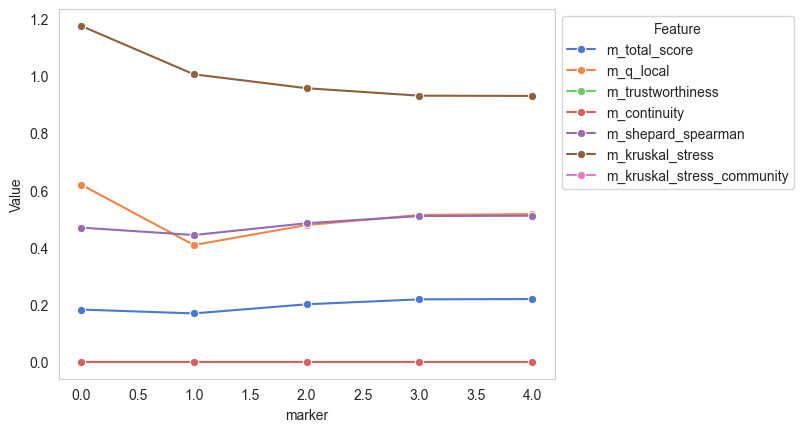

In [20]:
visualization.plot_metrics_report(metrics_df_uci360)

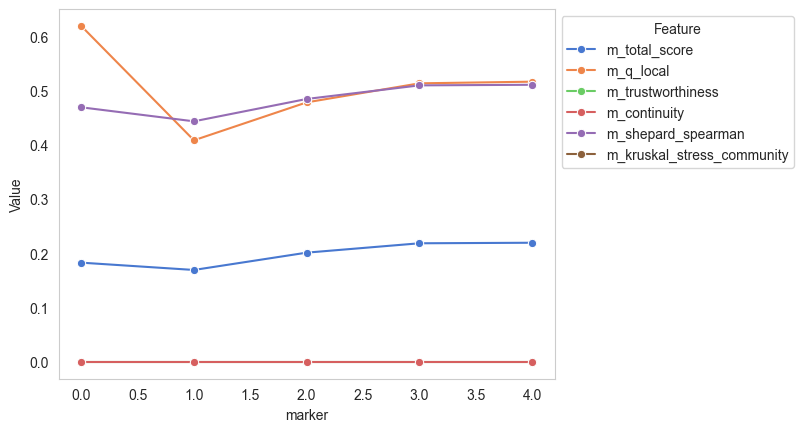

In [21]:
metrics_df_uci360 = metrics_df_uci360.drop("m_kruskal_stress", axis=1)
visualization.plot_metrics_report(metrics_df_uci360)

## Interactive Visualization

In [22]:
import utils

utils.save_pickle(embeddings_uci360, filename="results_ml_dr_uci360")

In [ ]:
import utils

embeddings_uci360 = utils.load_pickle(filename="results_ml_dr_uci360_20250508-170711")

In [ ]:
for emb in embeddings_uci360:
    emb.labels = {i: X_uci360.at[i, target_feature_uci360] for i in range(len(X_uci360))}

In [24]:
from dash_overlay import DashOverlay

dash_app = DashOverlay(embeddings_uci360)

In [ ]:
dash_app.run()